<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

**Artificial Intelligence - MSc** CS6501 - MACHINE LEARNING AND APPLICATIONS

**Business Analytics - MSc** ET5003 - MACHINE LEARNING APPLICATIONS 

***Annual Repeat***

### Instructor: Enrique Naredo

### RepMLA_Etivity-2.0

In [37]:
# Enter your details here:
Student_ID = "16099958" #@param {type:"string"}
Student_full_name = "Paerhati Remutula" #@param {type:"string"}

In [39]:
#@title Current Date
Today = '2021-08-03' #@param {type:"date"}

In [38]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# Introduction

[Classification](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623) is the process of predicting the class of given data points.

- An easy to understand example is classifying emails as “spam” or “not spam.”
- In machine learning an algorithm learns how to assign a class label to examples from a problem domain.
- Classification belongs to the category of supervised learning where the targets also provided with the input data.

In this notebook we will solve a classification problem using the well-known Mnist dataset and the also well-known classifier algorithm Logistic Regression.

# Dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.

- The MNIST database contains 60,000 training images and 10,000 testing images.
- An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters

### Import Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import the MNIST dataset
from keras.datasets import mnist
# load the MNIST dataset
data = mnist.load_data()

### Training and Testing set

In [4]:
# Dataset is a class 'tuple'
# A tuple is an (immutable) ordered list of values
print(type(data))

<class 'tuple'>


In [5]:
# it has two tuples
# data -> data[0] & data[1]
# data[0]-> (train)
# data[1]-> (test)
len(data)

2

In [6]:
# each tuple has other two tuples
# each containing: (dataPoints, classLabels)
print(len(data[0]))
print(len(data[1]))

2
2


In [7]:
# 1st main tuple (train)
# 2nd main tuple (test)
(X_train, y_train), (X_test, y_test) = data

**Train**
 - X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
 - 60,000 images
 - Each image is a matrix of 28x28 pixels
 - Pixel values range from 0 to 255.

 - y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.


In [8]:
# shape returns the number of corresponding elements
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


**Test**
 - X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. 
 - 10,000 images
 - Each image is a matrix of 28x28 pixels
 - Pixel values range from 0 to 255.

 - y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [9]:
# shape returns the number of corresponding elements
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Showing the data

In [10]:
# each data element is a different image
# arranged in a matrix with pixel values range from 0 to 255
# pixels close to 0 tends to black
# pixels close to 255 tends to white
# here the first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
# class labels are the number 
# corresponding to the handwriten

# here the first 10 
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Class label for this image: 5


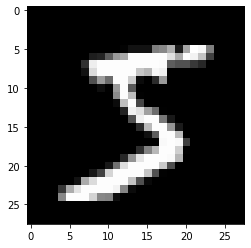

In [12]:
# A data element in the training set
image_train = 0
plt.imshow(X_train[image_train, :, :], cmap='gray')
print('Class label for this image: ' + str(y_train[image_train]))

Class label for this image: 7


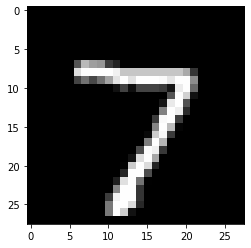

In [13]:
# A data element in the test set
image_test = 0
plt.imshow(X_test[image_test,:,:],cmap='gray')
print('Class label for this image: ' + str(y_test[image_test]))

In [14]:
# Function to plot an arrange of images
def plot_images(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gray', **options)
    plt.axis("off")

True value =
 [[5 0 4 1 9 2 1 3 1]
 [4 3 5 3 6 1 7 2 8]
 [6 9 4 0 9 1 1 2 4]]


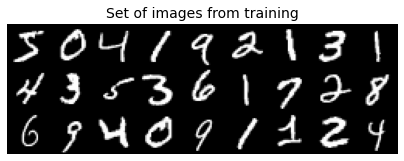

In [15]:
# Plotting a set of images from training
plt.figure(figsize=(7, 7))
plot_images(X_train[0: 27, :], images_per_row=9)
plt.title("Set of images from training", fontsize=14)
print("True value =\n", y_train[0:27].reshape(-1, 9))

True value =
 [[7 2 1 0 4 1 4 9 5]
 [9 0 6 9 0 1 5 9 7]
 [3 4 9 6 6 5 4 0 7]]


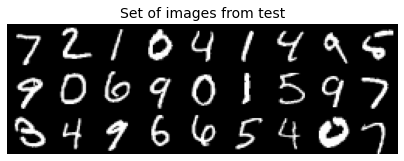

In [16]:
# Plotting a set of images from test
plt.figure(figsize=(7,7))
plot_images(X_test[0:27,:],images_per_row=9)
plt.title("Set of images from test", fontsize=14)
print("True value =\n",y_test[0:27].reshape(-1,9))

# Classifying images

An [image](https://en.wikipedia.org/wiki/Image) (from Latin: imago) is an artifact that depicts visual perception, such as a photograph or other two-dimensional picture, that resembles a subject—usually a physical object—and thus provides a depiction of it. 

- In the context of signal processing, an image is a distributed amplitude of color(s).
- A [greyscale](https://en.wikipedia.org/wiki/Grayscale) image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information. 
- Greyscale images, a kind of black-and-white or grey monochrome, are composed exclusively of shades of grey. 
- The contrast ranges from black at the weakest intensity to white at the strongest.

In [17]:
# Visualize the intensity values
# and the actual tone in each pixel
image2show = 10

df = pd.DataFrame(X_train[image2show, :, :])
df = df.style.background_gradient(cmap='gray')
display(df)

print('\n\n\nClass label for this image: ' + str(y_train[image2show]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0





Class label for this image: 3


## Converting a set of images into a table
Convert each image (a $28\times 28$ matrix) into a **row** vector, whose dimension is $1 \times 784$.

In [18]:
X_train_r = X_train.reshape(X_train.shape[0], 28*28)
X_test_r  = X_test.reshape(X_test.shape[0], 28*28)

In [19]:
datav = np.hstack([X_train_r, y_train.reshape(-1, 1)])
df = pd.DataFrame(datav[0:7, :])
df = df.style.background_gradient(cmap='gray')
display(df)

## Scaling
Scale the resulting matrix to the interval $[0,1]$, so we can now apply a machine leaning such as:
* logistic regression
* multi-layer perceptron 

In [20]:
## scale to [0,1]

# dividing over the max value: 255
X_train_r = X_train_r/255
X_test_r = X_test_r/255

# Methods

## Logistic Regression

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), in statistics the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 

* This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. 
* Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. 

### Student Note

The code cell below raises warnings regarding the model not converging before reaching the max iteration limit. I have since updated the max_iter count to be 1000, now the warning is gone. 

Upside of having a larger iteration count is the model can have a better chance of reducing the loss, downside is longer training time, and potential risk of overfitting. 

In [23]:
# import the LogisticRegression
from sklearn.linear_model import LogisticRegression
import time

LR = LogisticRegression(multi_class='multinomial',solver='lbfgs',  fit_intercept=True, max_iter=1000)

print(f'LR model created, training started at {time.time():.2f}')
LR.fit(X_train_r, y_train)

print(f'Training completed at {time.time():.2f}, test starting...')
y_pred = LR.predict(X_test_r)

print(f'Test complete at {time.time():.2f}')
print("Training set score: %f" % LR.score(X_train_r, y_train))
print(f"Testing set score: {LR.score(X_test_r, y_test)}")


LR model created, training started at 1628107021.32
Training completed at 1628107152.67, test starting...
Test complete at 1628107152.69
Training set score: 0.939267
Testing set score: 0.9256


In [26]:
# Cross check y_pred with y_test actual labels
match_count = 0
for (actual, predict) in zip(y_test, y_pred):
    if actual == predict:
        match_count += 1

print(f'Correct prediction rate: {match_count / len(y_test) * 100:.2f}%')  # this number is the same as "Testing set score" in the above code cell.

Correct prediction rate: 92.56%


## Multi-layer perceptron

A multilayer perceptron ( [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron)) is a class of feedforward artificial neural network (ANN). 

* The term MLP is used ambiguously, sometimes loosely to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons.
* An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. 
* Except for the input nodes, each node is a neuron that uses a nonlinear activation function. 
* MLP utilizes a supervised learning technique called backpropagation for training.
* Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. 

In [30]:
# import the MLPClassifier
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

### Student Note

The code cell below with training the MLP model was raising Convergence Warning - reaching the max iter count before converging. I have updated the max_iter count to be 500 in the code cell above for when creating the model. 

In [31]:
# train MLPClassifier
MLPC.fit(X_train_r, y_train)

# TODO: try fix the sklearn convergence warning 


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=500,
              random_state=1, solver='sgd', verbose=10)

### Student Note

The training stopped at iteration 55 as there wasn't anymore significant reduction in loss. 

In [32]:
print("Training set score: %f" % MLPC.score(X_train_r, y_train))

Training set score: 1.000000


### Student Note

Training set score of 100% is a bit concerning, let's see how the model behaves with the testing set. 

In [33]:
print(f'Testing set score: {MLPC.score(X_test_r, y_test)}')

Testing set score: 0.9731


### Student Note

97.31% is pretty good! Happy days. 

# Tasks:
* Compute the accuracy of the classifier
* Compute the confusion matrix of the predictions versus the true classes (see [link](https://www.python-course.eu/confusion_matrix.php) about what a confusion matrix is and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) how to compute and plot it).
* Visualise (using the plot function provided at the beginning of the notebook) instances (images) where the predicted class was wrong. What can you notice?

## Task 1 - Compute the accuracy of the classfiers

In [57]:
# Accuracy of the Logistic Regression model
# This LR.score method will take in the test dataset, test labels, 
#  run the model's prediction, then compare the prediction result with the actual labels, 
#  finally return a match percentage. 
LR.score(X_test_r, y_test)

0.9256

In [35]:
# Accuracy of the MLP model
MLPC.score(X_test_r, y_test)

0.9731

## Task 2 - Compute the confusion matrix of the predictions versus the true classes

### Logistic Regression

In [58]:
# Metrics plot preperation
from sklearn.metrics import plot_confusion_matrix
# The classes we have in the dataset is hand written digits between 0 - 9, put these into a list 
classes = [i for i in range(0, 10)]
# this titles_options is later used in the plot_confusion_matrix method, 
# for plotting a raw count, and a normalized value. 
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]


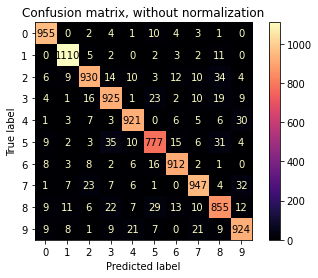

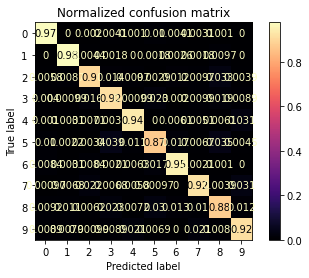

In [62]:
# Iterate through non-normalized, and normalized plotting options
for title, normalize_flag in titles_options:
    # call the plot_confusion_matrix method with the model (LR), test data set, and its labels
    display = plot_confusion_matrix(LR, X_test_r, y_test,
                                 display_labels=classes,  # classes from 0 to 9
                                 cmap='magma',  # colour map used in the confusion matrix chart
                                 normalize=normalize_flag)
    display.ax_.set_title(title)

### Student Note

From the confusion matrix above, we can see that for class '1', the model is predicting very well (as can be seen from the bright yellow colour and its normalized value of 0.98). 

For class '5', the model is struggling the most, with the lowest match count of 777 and a normalized value of 0.87. 

If we look at the horizontal line where True label is 5, we can see the count for prediction '3' and '8' is higher than others, this is most likely due to the fact that people write number 5 and sometimes it looks like 3 or 8. 

### Student Note

See [this link](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) for a full list of colour map you can choose for plotting the confusion matrix. 

### Multi-Layer Perceptron

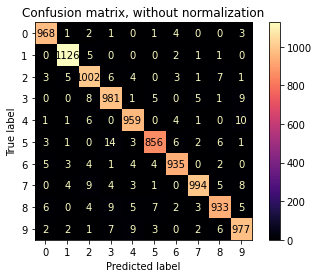

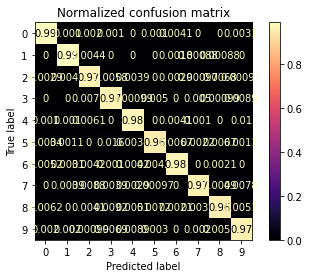

In [63]:
for title, normalize_flag in titles_options:
    display = plot_confusion_matrix(MLPC, X_test_r, y_test,  # this time pass in the MLP model, the rest is the same. 
                                 display_labels=classes,
                                 cmap='magma',
                                 normalize=normalize_flag)
    display.ax_.set_title(title)

### Student Note

For the MLP model, we can see the overall performance is considerably better than the LR model, with '1' being the easiest class to predict, while all classes have a normalized score of 0.96 and above. 

## Task 3 - Visualise instances (images) where the predicted class was wrong. What can you notice?

### Logistic Regression

In [77]:
# First, find the instances that were mis-classified by the LR model

# Run the prediction and store results into LR_prediction
LR_prediction = LR.predict(X_test_r)

# An empty list to hold the indices of the mis-classified instances
LR_mistake_indices = []

# Go through the actual labels and the prediction result, compare the two, 
# if there is a mismatch, append this instance's index to the list above
for i, (true_label, prediction) in enumerate(zip(y_test, LR_prediction)):
    if true_label != prediction: 
        LR_mistake_indices.append(i)

print(len(LR_mistake_indices))

744


### Student Note

There are 744 instances where the LR model got it wrong. Let's take a look at the first 10

Text(0.5, 1.0, 'Set of images from training')

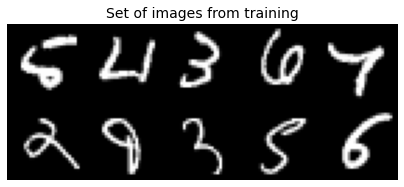

In [84]:
# Plotting a set of images from the original test set before reshaping
plt.figure(figsize=(7, 7))

# here we can access certain items in a list (X_test) by passing another list (first 10 of LR_mistake_indices),
# this loosely translates to "from this X_test list, give me the items at these indices"
# This same code is used in a code cell below for accessing the labels. 
plot_images(X_test[LR_mistake_indices[:10]])
plt.title("Set of images from training", fontsize=14)

### Student Note

These images don't look like numbers!!! Written by a spider on a hot plate :) 

### Let's see what they actually are, and what the model predicted them as 

In [75]:
print("True value =\n", y_test[LR_mistake_indices[:10]].reshape(2, 5))
print("Prediction =\n", LR_prediction[LR_mistake_indices[:10]].reshape(2, 5))

True value =
 [[5 4 3 6 7]
 [2 9 3 5 6]]
Prediction =
 [[6 6 2 2 4]
 [9 3 5 7 5]]


### Multi-Layer Perceptron

In [78]:
# First, find the instances that were mis-classified by the LR model

# Run the prediction and store results into LR_prediction
MLP_prediction = MLPC.predict(X_test_r)

# An empty list to hold the indices of the mis-classified instances
MLP_mistake_indices = []

# Go through the actual labels and the prediction result, compare the two, 
# if there is a mismatch, append this instance's index to the list above
for i, (true_label, prediction) in enumerate(zip(y_test, MLP_prediction)):
    if true_label != prediction: 
        MLP_mistake_indices.append(i)

print(len(MLP_mistake_indices))

269


### Student Note

MLP model got 269 instances wrong, much better than the LR model. Let's take a look

Text(0.5, 1.0, 'Set of images from training')

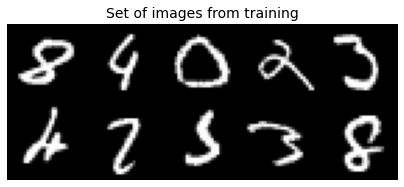

In [79]:
# Plotting a set of images from the original test set before reshaping
plt.figure(figsize=(7, 7))
plot_images(X_test[MLP_mistake_indices[:10]])
plt.title("Set of images from training", fontsize=14)

### Student Note

Yep, let's take a look at the actual labels and the prediction result for these ancient Rome wall art

In [82]:
print("True value =\n", y_test[MLP_mistake_indices[:10]].reshape(2, 5))
print("Prediction =\n", MLP_prediction[MLP_mistake_indices[:10]].reshape(2, 5))

True value =
 [[8 4 0 2 3]
 [4 2 5 3 8]]
Prediction =
 [[2 9 9 4 2]
 [2 7 3 7 2]]


# Summary

Some of these hand written digits don't look like any numbers between 0 - 9, or, one could say they look like anything. Perhaps a higher resolution of the same images would improve the model's accuracy? 

In terms of overall performance, the Multi-Layer Perceptron model is considerably better than the Logistic Regression model, with 97% accuracy on the test set, while LR has an accuracy of about 92% on the same test set. 

The orignal settings of 10 for max iteration for both models were too small, the models couldn't converge, raising them helped the model's convergence and raised the accuracy (reduced loss). 

Sci-kit Learn's prebuilt confusion matrix plotting is a great little tool! 

Also thanks to Enrique's method for organizing and plotting the images, it's a very neat way of putting a list of images into a grid. 

# References

1. [Confusion Matrix from Sci-kit Learn.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)